In [1]:
import numpy as np
import random
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
import time
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


from pso import PSO
#from cma_es import CMA_ES
from cmaes_adjusted import CMA_ES
from differential_evolution import DifferentialEvolutionAlgorithm
from depso import DEPSO
from opt_ai_net import OptAiNet


In [2]:
#bound_values = np.array([(-10,10), (-10,10)])

def schaffer_function(mat_x_y, bound_values):
    min_mat = bound_values.T[0, :]
    max_mat = bound_values.T[1,:]
    mat_x_y_denorm = mat_x_y * (max_mat - min_mat) + min_mat
    x = mat_x_y_denorm[:, 0]
    y = mat_x_y_denorm[:, 1]

    g = 0.5 + (np.power((np.sin( np.sqrt( np.power(x, 2) + np.power(y, 2)))), 2) - 0.5)/ \
        (1 + 0.001 * (np.power(x, 2) + np.power(y, 2)))
    return g

100%|██████████| 50/50 [00:00<00:00, 2227.39it/s]

--- 0.031049013137817383 seconds ---


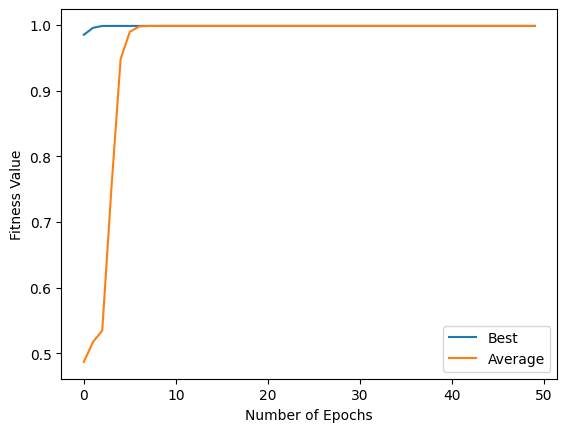

In [3]:
cmaes = CMA_ES(
    num_epochs=50,
    chrom_length=2,
    lamb=200,
    sigma=0.6,
    mi=30,
    fitness_func=schaffer_function,
    value_ranges=np.array([(-10,10), (-10,10)]),
    maintain_history=True
)

best_solutions = cmaes.fit()
cmaes.plot()
    

In [4]:
cmaes.fitness_calls_list

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [5]:
best_solutions

array([[0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976],
       [0.57799334, 0.49108976]])

Text(0.5, 0, 'z')

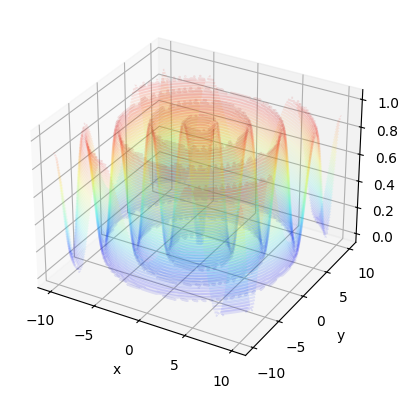

In [6]:
def schaffer_function_plot(x,y):
    g = 0.5 + (np.power((np.sin( np.sqrt( np.power(x, 2) + np.power(y, 2)))), 2) - 0.5)/ \
        (1 + 0.001 * (np.power(x, 2) + np.power(y, 2)))
    return g

value_ranges = np.array([[-10,10], [-10,10]])
min_mat = value_ranges.T[0, :]
max_mat = value_ranges.T[1,:]
best_solutions_denorm = best_solutions * (max_mat - min_mat) + min_mat


x_data = best_solutions_denorm[:, 0]
y_data = best_solutions_denorm[:, 1]
z_data = schaffer_function_plot(x_data, y_data)
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)

X, Y = np.meshgrid(x, y)
Z = schaffer_function_plot(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='jet', alpha=0.1)
ax.scatter3D(x_data, y_data, z_data, c=z_data, cmap='binary', alpha=1)
#ax.set_xlim3d(-10,10)
#ax.set_ylim3d(-10,10)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


Global optimal at f([-0.30303030303030276, -3.1313131313131315])=0.004918708674121586


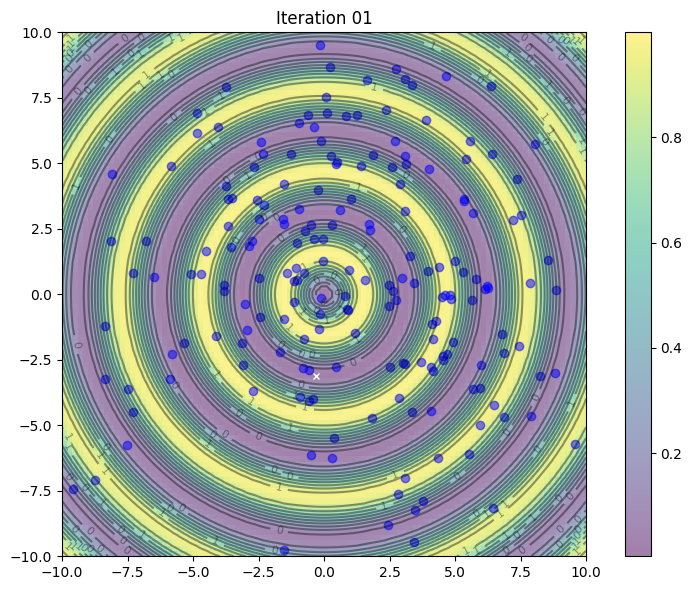

In [7]:
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100)))
z = schaffer_function_plot(x, y)
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

particles = cmaes.x_i_history

fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[-10, 10, -10, 10], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
#p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
#pbest_plot = ax.scatter(pbests[0][:,0],pbests[0][:,1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(particles[0][:,0], particles[0][:,1], marker='o', color='blue', alpha=0.5)
#p_arrow = ax.quiver(particles[0][:,0], particles[0][:,1], speeds[0][:,0], speeds[1][:,1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
#gbest_plot = plt.scatter([gbests[0][0]], [gbests[0][1]], marker='*', s=100, color='black', alpha=0.4)

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])


def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    ax.set_title(title)
    #pbest_plot.set_offsets(pbests[i])
    p_plot.set_offsets(particles[i])
    #p_arrow.set_offsets(particles[i])
    #p_arrow.set_UVC(speeds[i][:,0], speeds[i][:,1])
    #gbest_plot.set_offsets(gbests[i].reshape(1,-1))
    return ax, p_plot

anim = FuncAnimation(fig, animate, frames=list(range(1,len(particles))), interval=150, blit=False, repeat=True)
anim.save("cmaes.gif", dpi=120, writer="imagemagick")

#print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], schaffer_function_plot(x_min,y_min)))
#HTML(anim.to_jshtml())
